# Step 1: Import Libraries and Set Up Environment

Importing necessary libraries for data manipulation, machine learning, and image processing.

In [206]:
# Step 1: Import Libraries and Set Up Environment
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import warnings

# Suppress warnings and set up visualization styles

In [207]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='viridis')


In [208]:
print(f"TensorFlow version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.17.1
Num GPUs Available:  1


# Step 2: Define Constants and Load Data Paths

This section defines constants for file paths and labels for the diagnosis categories. It also loads a sample of the training and testing datasets.

In [209]:
# Define Constants and Load Data Paths
DATA_FOLDER = r"/content"  # Replace with your data folder path
TRAIN_FILE = "train-00000-of-00001-c08a401c53fe5312.parquet"
TEST_FILE = "test-00000-of-00001-44110b9df98c5585.parquet"

DIAGNOSIS_LABELS = {
    0: "Mild Demented",
    1: "Moderate Demented",
    2: "Non Demented",
    3: "Very Mild Demented"
}

In [210]:
# Construct file paths for train and test datasets
train_file_path = os.path.join(DATA_FOLDER, TRAIN_FILE).replace("\\", "/")
test_file_path = os.path.join(DATA_FOLDER, TEST_FILE).replace("\\", "/")

In [211]:
# Load the training and testing datasets (use small samples for demonstration)
train_data = pd.read_parquet(train_file_path)  # Load first 100 rows for training
test_data = pd.read_parquet(test_file_path)     # Load first 50 rows for testing

print("Training and testing data loaded successfully.")

Training and testing data loaded successfully.


# Step 3: Define Image Decoding Function

This function decodes byte-encoded images into NumPy arrays for further processing.


In [212]:
def decode_image_from_bytes(image_dict):
    """
    Decodes image bytes into a NumPy array.
    """
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)  # Decode as a color image (BGR format)
        return img
    return None

print("Image decoding function defined.")

Image decoding function defined.


# Step 4: Apply Decoding to Train and Test DataFrames

This section applies the decoding function to both the training and testing datasets.

In [213]:
train_data['decoded_scan'] = train_data['image'].apply(decode_image_from_bytes)
test_data['decoded_scan'] = test_data['image'].apply(decode_image_from_bytes)

print("Images decoded successfully.")

Images decoded successfully.


# Step 5: Display Sample Data and Label Distribution

This part displays sample data from both datasets and plots the distribution of diagnoses in the training set.

In [214]:
train_data.head()

,image,label,decoded_scan
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [215]:
test_data.head()

,image,label,decoded_scan
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


### 5.1  Plot label distribution in the training dataset

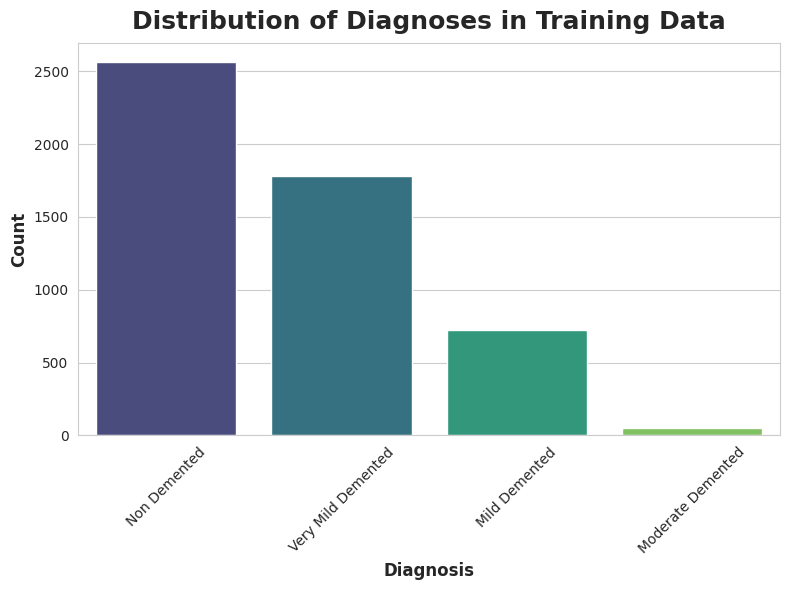

In [216]:
label_distribution = train_data['label'].map(DIAGNOSIS_LABELS ).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")
plt.title("Distribution of Diagnoses in Training Data")
plt.ylabel("Count")
plt.xlabel("Diagnosis")
plt.xticks(rotation=45)
plt.show()


#Exploratory Data Analysis

Displaying Unique MRI pictures

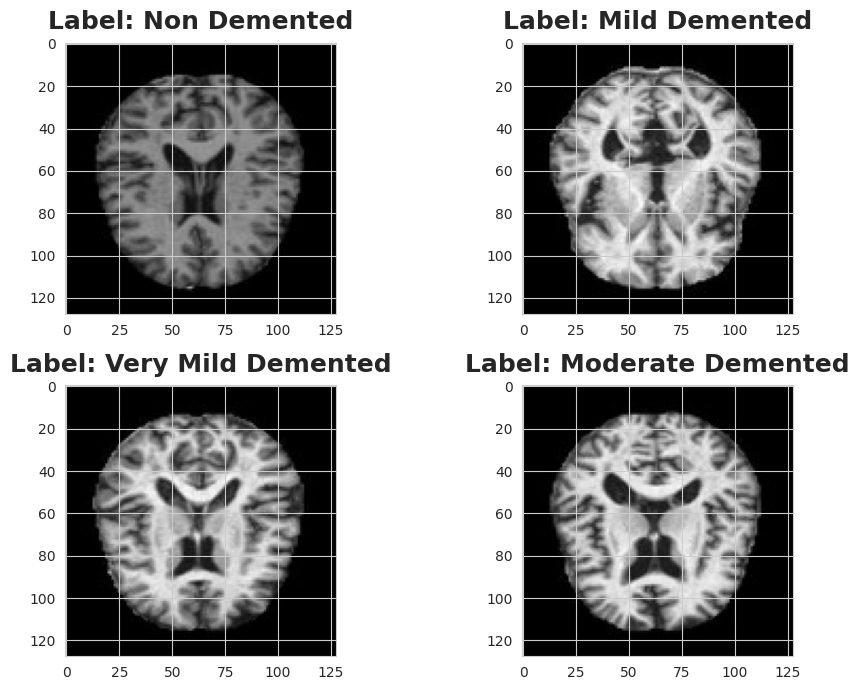

In [217]:
import matplotlib.pyplot as plt


# Training images and labels
mri_images = train_data['decoded_scan']
labels = train_data['label']  # Assuming the labels are in this column

# Get unique labels
unique_labels = labels.unique()

fig = plt.figure(figsize=(10, 7))

# Loop over each unique label and display the first image of that label
for i, label in enumerate(unique_labels):
    # Find the first image corresponding to the current label
    image_index = labels[labels == label].index[0]

    ax = fig.add_subplot(2, 2, i + 1)  # Create subplot
    ax.imshow(mri_images.iloc[image_index])  # Display the image
    ax.set_title(f"Label: {DIAGNOSIS_LABELS[label]}")  # Display the diagnosis label as the title

plt.show()


# Step 6: Preprocess Images for Model Input (Resizing and Normalization)

In this section, images are resized to a uniform size of (128 \times 128) pixels and normalized to have pixel values between (0) and (1).


In [218]:

def preprocess_images(image_array):
    """
    Resize images to (128x128) and normalize pixel values.
    """
    resized_images = []
    for img in image_array:
        if img is not None:
            resized_img = cv2.resize(img, (128, 128)) / 255.0  # Normalize pixel values to [0,1]
            resized_images.append(resized_img)
        else:
            resized_images.append(np.zeros((128, 128, 3)))  # Placeholder for missing images
    return np.array(resized_images)

X_train_images = preprocess_images(train_data['decoded_scan'])
X_test_images = preprocess_images(test_data['decoded_scan'])

y_train_labels = train_data['label'].values
y_test_labels = test_data['label'].values

print(f"Training images shape: {X_train_images.shape}")
print(f"Testing images shape: {X_test_images.shape}")

Training images shape: (5120, 128, 128, 3)
Testing images shape: (1280, 128, 128, 3)


# Step 7: Split Training Data into Train/Validation Sets

The training data is split into training and validation sets to evaluate model performance during training.

In [219]:
X_train, X_val, y_train, y_val = train_test_split(X_train_images, y_train_labels, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 3584
Validation set size: 1536


Handle Class Imbalance by assigning class weights

In [220]:
# Calculate class weights:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weights_dict = dict(enumerate(class_weights))

Define Early Stopping and model Checkpoint

In [221]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define model checkpoint
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Step 8: Build the 1ST CNN Model for Classification

This section defines a CNN architecture with convolutional keras.layers followed by max pooling layers. The model is compiled with an optimizer and loss function suitable for multi-class classification.

In [222]:
model1 = keras.Sequential([

    # First Block with fewer filters
    layers.Conv2D(kernel_size=3, filters=16, input_shape=([128, 128, 3]), activation='relu'),
    layers.MaxPool2D(),

    # Second Block with fewer filters
    layers.Conv2D(filters=32, activation='relu', kernel_size=3),
    layers.MaxPool2D(),

    # Output Layers with fewer units in Dense Layer
    layers.Flatten(),
    layers.Dense(units=32, activation='relu'),  # Reduced number of units
    layers.Dense(units=4, activation='softmax')
])

lr1_3 = 0.0005
epochs1_3 = 20
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr1_3),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


## Step 9: Train the Model on Training Data

The model is trained on the training dataset while validating on the validation dataset over a specified number of epochs.

In [223]:

# Train the model
history_model_1 = model1.fit(
    X_train, y_train,
    steps_per_epoch=len(X_train),
    batch_size=64,  # Increased batch size for more noise in training
    validation_data=(X_val, y_val),
    validation_steps=len(X_val),
    epochs=epochs1_3,
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weights_dict
)

Epoch 1/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 4s 644us/step - accuracy: 0.3046 - loss: 1.3730 - val_accuracy: 0.2708 - val_loss: 1.3858
Epoch 2/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.3759 - loss: 1.2507 - val_accuracy: 0.4238 - val_loss: 1.3210
Epoch 3/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 1s 298us/step - accuracy: 0.4648 - loss: 1.0435 - val_accuracy: 0.4525 - val_loss: 1.1912
Epoch 4/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.4973 - loss: 0.8636 - val_accuracy: 0.4577 - val_loss: 0.9958
Epoch 5/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 1s 298us/step - accuracy: 0.5391 - loss: 0.7187 - val_accuracy: 0.5078 - val_loss: 0.9932
Epoch 6/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.5996 - loss: 0.6332 - val_accuracy: 0.5514 - val_loss: 0.9445
Epoch 7/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - accuracy: 0.6358 - loss: 0.5710 - val_accuracy: 0.6126 - val_loss: 0.8301
Epoch 8/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step - accuracy: 0.6676 -

## Step 10: Evaluate the Model on Test Data

The trained model is evaluated on the test dataset to determine its accuracy.

In [224]:
# prompt: evlauate model on train and test data

# Evaluate the model on the training data
train_loss, train_accuracy = model1.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the test data
test_loss, test_accuracy = model1.evaluate(X_test_images, y_test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.8937
Test Accuracy: 0.8078


## Step 11: Visualize Training History (Loss and Accuracy)

Finally, this section visualizes the training history by plotting loss and accuracy metrics over epochs for both training and validation datasets.

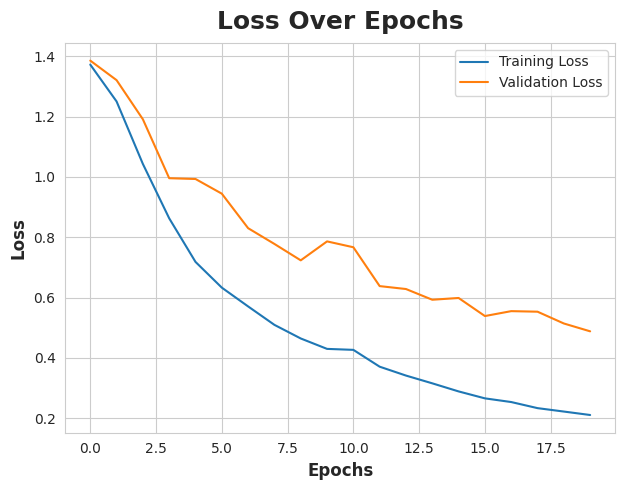

In [225]:
plt.figure(figsize=(12, 5))

# Plot training/validation loss over epochs
plt.subplot(1, 2, 1)
plt.plot(history_model_1.history['loss'], label='Training Loss')
plt.plot(history_model_1.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


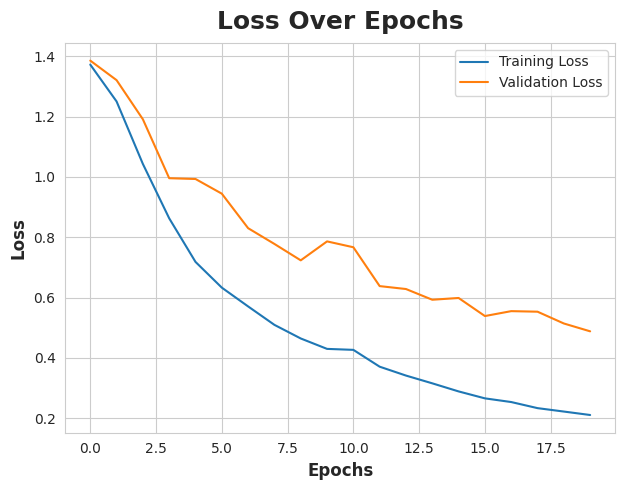

In [226]:
plt.figure(figsize=(12, 5))

# Plot training/validation loss over epochs
plt.subplot(1, 2, 1)
plt.plot(history_model_1.history['loss'], label='Training Loss')
plt.plot(history_model_1.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Step 9 Build 2nd Model: CNN with 3 layers

In [227]:
import tensorflow as tf
from tensorflow.keras import layers, models

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8,  # Increased patience to 8 epochs
    restore_best_weights=True
)

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

In [228]:

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-07),  # Adjusted learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_model_2 = model2.fit(
    X_train, y_train,
    steps_per_epoch=len(X_train),
    batch_size=32,
    validation_data=(X_val, y_val),
    validation_steps=len(X_val),
    epochs=20,  # Try up to 20 epochs
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weights_dict
)


Epoch 1/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4169 - loss: 1.4998 - val_accuracy: 0.3431 - val_loss: 5.3525
Epoch 2/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5572 - loss: 0.8272 - val_accuracy: 0.3555 - val_loss: 1.8326
Epoch 3/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6489 - loss: 0.6219 - val_accuracy: 0.5182 - val_loss: 1.7546
Epoch 4/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7346 - loss: 0.4577 - val_accuracy: 0.5814 - val_loss: 1.4296
Epoch 5/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8031 - loss: 0.3466 - val_accuracy: 0.7923 - val_loss: 0.5178
Epoch 6/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8509 - loss: 0.2624 - val_accuracy: 0.7526 - val_loss: 0.5912
Epoch 7/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8849 - loss: 0.2162 - val_accuracy: 0.8398 - val_loss: 0.4415
Epoch 8/20
3584/3584 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8812 - loss: 0.2164 -

In [229]:
_, train_accuracy = model2.evaluate(X_train, y_train, verbose=0)
_, test_accuracy = model2.evaluate(X_test_images, y_test_labels, verbose=0)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9977678656578064
Test Accuracy: 0.949999988079071


Hyperparameter Tuning

In [ ]:
import itertools

def custom_grid_search(model, param_grid, X_train, y_train, X_val, y_val):
    best_params = {}
    best_val_accuracy = 0

    for params in itertools.product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        print(f"Trying parameters: {param_dict}")

        # Set parameters in the model
        model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=param_dict['learning_rate'], epsilon=param_dict['epsilon']),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train model with current set of parameters
        history = model2.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=param_dict['epochs'],
                            verbose=0, # Suppress output for each iteration
                            callbacks=[early_stopping],class_weight=class_weights_dict)

        val_accuracy = max(history.history['val_accuracy'])

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_params = param_dict

        print(f"Validation Accuracy: {val_accuracy}")

    print(f"Best parameters: {best_params}")
    print(f"Best validation accuracy: {best_val_accuracy}")
    return best_params

# Define the parameter grid for model 2
param_grid_model2 = {
    'learning_rate': [0.001, 0.0001],
    'epsilon': [1e-07, 1e-08],
    'epochs': [10, 20]
}

best_params_model2 = custom_grid_search(model2, param_grid_model2, X_train, y_train, X_val, y_val)

In [ ]:

# Re-train the model with the best parameters
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params_model2['learning_rate'], epsilon=best_params_model2['epsilon']),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

best_model2_history = model2.fit(X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=best_params_model2['epochs'],
            callbacks=[early_stopping])

(0.0, 1.0)

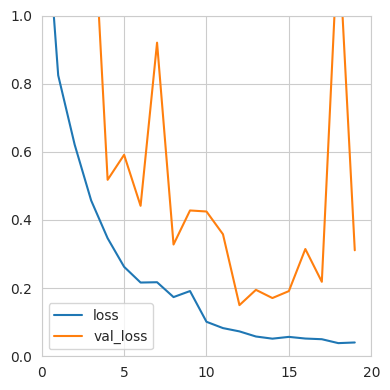

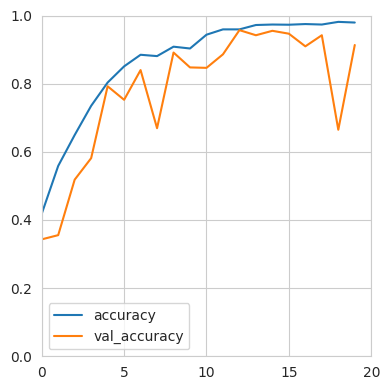

In [234]:

best_model2_history = pd.DataFrame(history_model_2.history)
best_model2_history.head()

plt.rcParams['figure.figsize'] = [4, 4]
# ### Model 2
# **Validation loss**
best_model2_history.loc[:,['loss', 'val_loss']].plot()
plt.xlim(0, 20)
plt.ylim(0, 1)
# **Validation Accuracy**
best_model2_history.loc[:,['accuracy', 'val_accuracy']].plot()
plt.xlim(0, 20)
plt.ylim(0, 1)

In [ ]:
model2.save('best_model2.keras')
print("Model2 saved as best_model2.keras")